In [23]:
import numpy as np
import matplotlib.pyplot as plt

3. Integrate the following set of ODE's on the computer:
$$ \frac{dx}{dt} = \sigma(y-x) \quad \frac{dy}{dt} = x(\rho - z) -y \quad \frac{dz}{dt} = xy - \beta z$$
using the Improved Euler Method. The initial conditions are $x(0)=1$, $y(0) = -1$ and $z(0)=30$ and the parameters take on the values $\sigma = 10, \beta = 8/3$ and $\rho =28$. Use a step size of $h=0.005$ and run it until $t=100$. Display your output by plotting $z(t)$ on the $y$-axis and $x(t)$ on the $x$-axis. 

We will use the improved euler formula:
$$ x_{n+1} = x_n + h\frac{f(t_n,x_n) + f(t_{n+1},x_{n+1})}{2}$$
which can be turned into an explicit formula by substituting the forward euler formula 
$f(t_{n+1},x_{n+1}) = f(t_n + h, x_n + hf(t_n,x_n))$ for the last term in the numerator:
$$ x_{n+1} = x_n + h\frac{f(t_n,y_n) + f(t_n + h, x_n + hf(t_n,x_n))}{2}$$

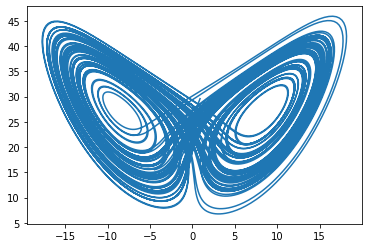

In [22]:
sigma = 10    #defining our parameters
rho = 28
beta = 8/3

def f1 (x,y,z):
    return sigma*(y-x)
def f2 (x,y,z):
    return (x*(rho - z) - y)
def f3 (x,y,z):
    return (x*y - beta*z)

def improvedEulerStep(X,Y,Z,h):
    temp1 = f1(X,Y,Z)
    newX = X + h*(temp1 + f1(X+h*temp1,Y,Z))/2
    temp2 = f2(X,Y,Z)
    newY = Y + h*(temp2 + f2(X,Y+h*temp2,Z))/2
    temp3 = f3(X,Y,Z)
    newZ = Z + h*(temp3 + f3(X,Y,Z+h*temp3))/2
    return (newX, newY, newZ)

Xvals,Yvals,Zvals = [],[],[]
def iterate(x0,y0,z0,steps,h):
    X,Y,Z = x0,y0,z0
    for n in range(steps-1):
        (X,Y,Z) = improvedEulerStep(X,Y,Z,h)
        Xvals.append(X)
        Yvals.append(Y)
        Zvals.append(Z)

iterate(1,-1,30,20000,0.005)
plt.plot(Xvals,Zvals)

So we see that the solutions to this system describe the famous lorentz attractors. I don't know how to plot in 3D but check out the plots of X agains Y and Y against Z and we can get kind of a cool ida of the 3d image.

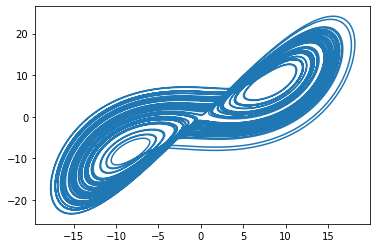

In [26]:
plt.plot(Xvals,Yvals)

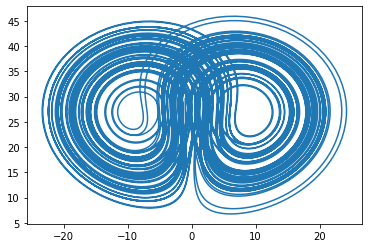

In [25]:
plt.plot(Yvals,Zvals)